<a href="https://colab.research.google.com/github/Bayrem-ben/colab.github.io/blob/main/Segmentation_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import cv2
import imutils
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab.patches import cv2_imshow

In [3]:
cha3b = os.path.join('/content/drive/My Drive/','cha3b.pdf')
elhayatalarabiya = os.path.join('/content/drive/My Drive/', 'elhayatalarabiya.pdf')
assabah = os.path.join('/content/drive/My Drive/', 'assabah.pdf')

In [4]:
#verification
for dirname, _, filenames in os.walk(assabah):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print(assabah)

/content/drive/My Drive/assabah.pdf


###Start###

PDF2Img

In [ ]:
!pip install pdf2image
!sudo apt-get install poppler-utils

In [ ]:
from pdf2image import convert_from_path
from matplotlib import pyplot as plt
from pdf2image import *
from google.colab import files
import numpy as np

l = []

pages = convert_from_path(assabah, dpi=200)

for idx,page in enumerate(pages):
#for page in pages:
    #page.save('page'+str(idx)+'.jpg', 'JPEG')
    #l.append(page)
    print(idx+1)
    l.append(page) #page.save('out.jpg', 'JPEG')

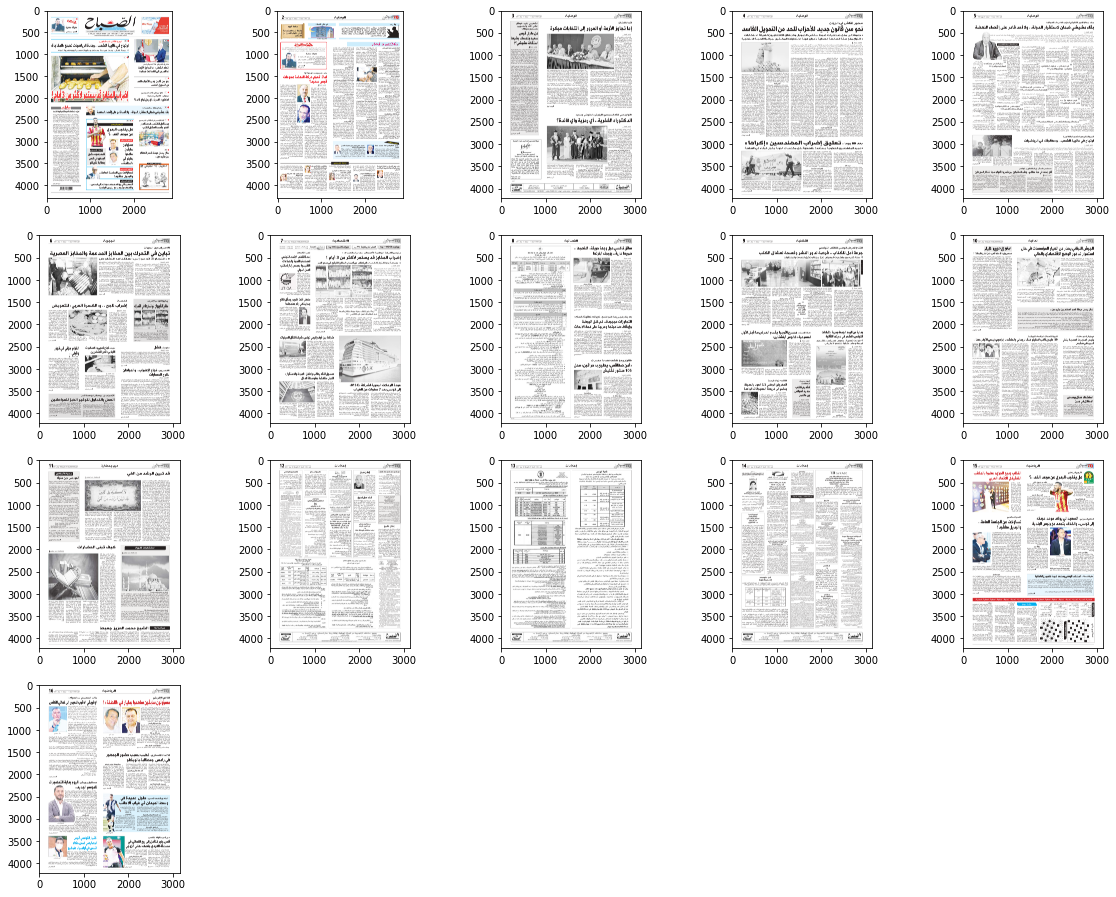

In [ ]:
new_path = '/content/drive/My Drive/pdf_to_img/'
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(5,5,i+1)    # the number of images in the grid
    plt.imshow(l[i], cmap='gray')
    if not os.path.exists(new_path):
        os.makedirs(new_path)
    cv2.imwrite(new_path+str(i+1)+ ".jpg", np.array(l[i]))
plt.show()
#plt.imshow(image)

###Crop_img###

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
from skimage.segmentation import clear_border


def bordure_img(path) :
  lis = []
  jour_l = []
  for fname in os.listdir(path):
      fpath = os.path.join(path, fname)
      print(fpath)
      if fpath.endswith("png") or fpath.endswith("jpg"): 
        img = cv2.imread(fpath)
        #Extract only blue channel as DAPI / nuclear (blue) staining is the best
        #channel to perform cell count.
        cells=img[:,:,0]  #Blue channel. Image equivalent to grey image.
        pixels_to_um = 0.454 # 1 pixel = 454 nm (got this from the metadata of original image)

        #Threshold image to binary using OTSU. ALl thresholded pixels will be set to 255
        ret1, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        # Morphological operations to remove small noise - opening
        #To remove holes we can use closing
        kernel = np.ones((3,3),np.uint8)
        opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
        opening = clear_border(opening) #Remove edge touching grains


        ### detect rectangle in image and crop
        h, w = opening.shape[:2]
        kernel = np.ones((15,15),np.uint8)

        e = cv2.erode(opening,kernel,iterations = 2)  
        d = cv2.dilate(e,kernel,iterations = 1)
        ret, th = cv2.threshold(d, 150, 255, cv2.THRESH_BINARY_INV)

        mask = np.zeros((h+2, w+2), np.uint8)
        cv2.floodFill(th, mask, (200,200), 255); # position = (200,200)
        out = cv2.bitwise_not(th)
        out= cv2.dilate(out,kernel,iterations = 3)
        cnt, h = cv2.findContours(out,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        for i in range(len(cnt)):
                    area = cv2.contourArea(cnt[i])
                    if(area>10000 ): #and area<100000):
                          mask = np.zeros_like(opening)
                          cv2.drawContours(mask, cnt, i, 255, -1)
                          x,y,w,h = cv2.boundingRect(cnt[i])
                          crop= img[ y:h+y,x:w+x]
                          lis.append(crop)

        merde = cv2.drawContours(image=img, contours=cnt, contourIdx=-1, color=(255, 0, 0), thickness=3, lineType=cv2.LINE_AA)
        jour_l.append(merde)
        #jour_l.append(opening)
  print(len(lis))
  return lis , jour_l

lis, jour_l = bordure_img("/content/drive/My Drive/pdf_to_img/")

/content/drive/My Drive/pdf_to_img/1.jpg
/content/drive/My Drive/pdf_to_img/2.jpg
/content/drive/My Drive/pdf_to_img/3.jpg
/content/drive/My Drive/pdf_to_img/4.jpg
/content/drive/My Drive/pdf_to_img/5.jpg
/content/drive/My Drive/pdf_to_img/6.jpg
/content/drive/My Drive/pdf_to_img/7.jpg
/content/drive/My Drive/pdf_to_img/8.jpg
/content/drive/My Drive/pdf_to_img/9.jpg
/content/drive/My Drive/pdf_to_img/10.jpg
/content/drive/My Drive/pdf_to_img/11.jpg
/content/drive/My Drive/pdf_to_img/12.jpg
/content/drive/My Drive/pdf_to_img/13.jpg
/content/drive/My Drive/pdf_to_img/14.jpg
/content/drive/My Drive/pdf_to_img/15.jpg
/content/drive/My Drive/pdf_to_img/.ipynb_checkpoints
/content/drive/My Drive/pdf_to_img/16.jpg
120


38


ValueError: ignored

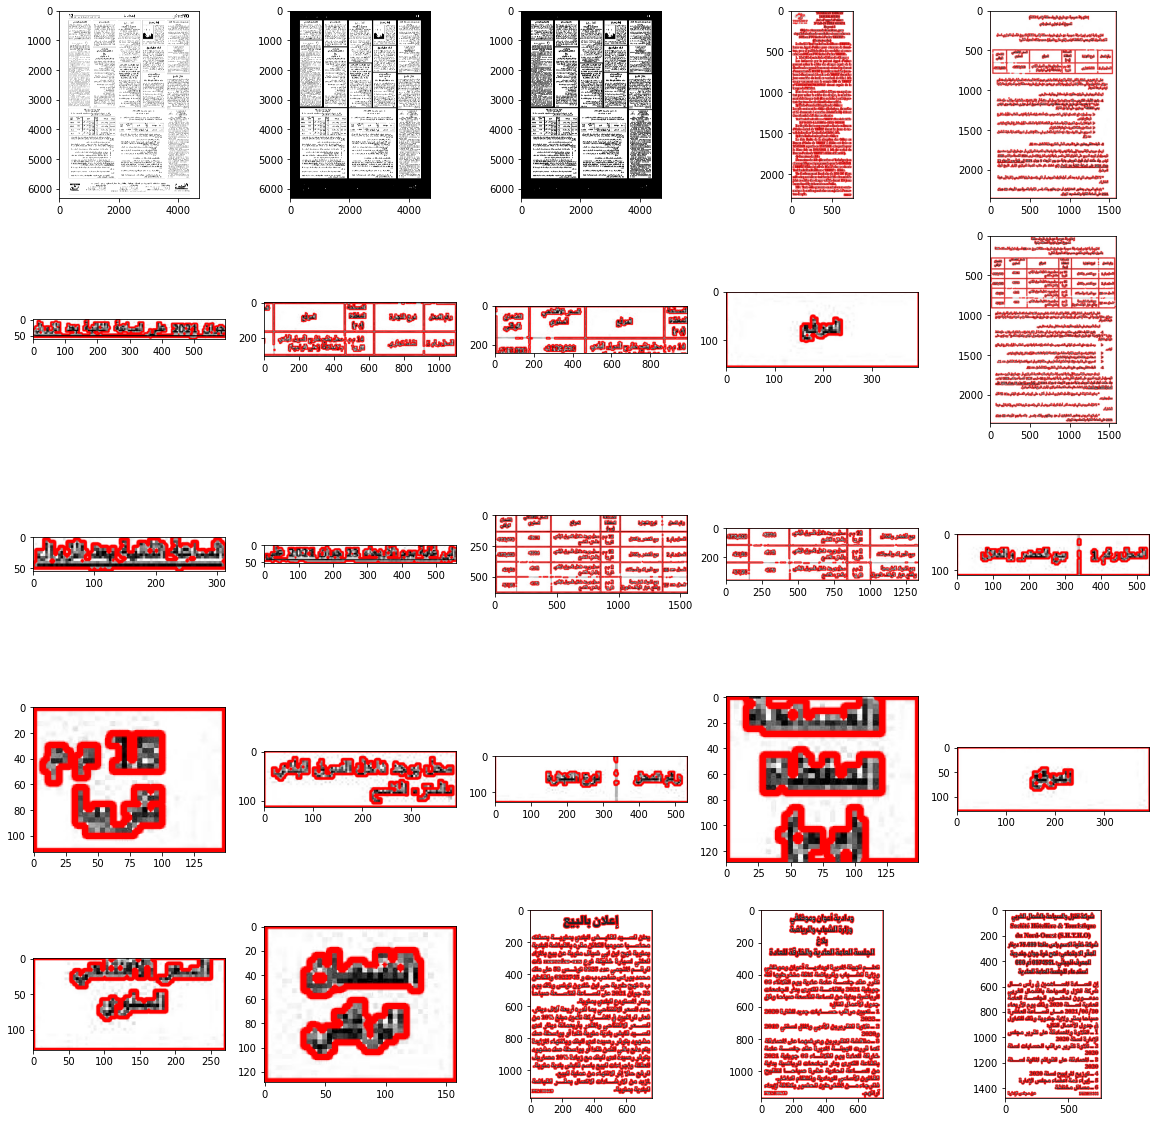

In [30]:
from skimage.segmentation import clear_border
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

#@title Default title text
#tunning
jour_l = []
img = cv2.imread('/content/drive/MyDrive/ImagesFromPDF/0012.jpg')
#Extract only blue channel as DAPI / nuclear (blue) staining is the best
#channel to perform cell count.
cells=img[:,:,0]  #Blue channel. Image equivalent to grey image.
pixels_to_um = 0.454 # 1 pixel = 454 nm (got this from the metadata of original image)
#Threshold image to binary using OTSU. ALl thresholded pixels will be set to 255
ret1, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
jour_l.append(thresh)
# Morphological operations to remove small noise - opening
#To remove holes we can use closing
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
opening = clear_border(opening) #Remove edge touching grains
jour_l.append(opening)

### detect rectangle in image and crop
h, w = opening.shape[:2]
kernel = np.ones((15,15),np.uint8)

e = cv2.erode(opening,kernel,iterations = 2)  
d = cv2.dilate(e,kernel,iterations = 1)
ret, th = cv2.threshold(d, 150, 255, cv2.THRESH_BINARY_INV)
#jour_l.append(th)

mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(th, mask, (200,200), 255); # position = (200,200)
out = cv2.bitwise_not(th)
kernel = np.ones((5,5),np.uint8)
out= cv2.erode(opening,kernel,iterations = 1)#3)
jour_l.append(out)
cnt, h = cv2.findContours(out,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(cnt)):
    area = cv2.contourArea(cnt[i])
    if(area>10000 ): #and area<100000):
        mask = np.zeros_like(opening)
        cv2.drawContours(mask, cnt, i, 255, -1)
        x,y,w,h = cv2.boundingRect(cnt[i])
        crop= img[ y:h+y,x:w+x]
        jour_l.append(crop)
merde = cv2.drawContours(image=img, contours=cnt, contourIdx=-1, color=(255, 0, 0), thickness=3, lineType=cv2.LINE_AA)
jour_l.append(merde)

print(len(jour_l))
plt.figure(figsize=(20,20))
for i in range(len(jour_l)):
    plt.subplot(5,5,i+1)    # the number of images in the grid
    plt.imshow(jour_l[i], cmap='gray')
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
for i in range(len(jour_l)):
    plt.subplot(5,5,i+1)    # the number of images in the grid
    plt.imshow(jour_l[i], cmap='gray')
plt.show()
#plt.imshow(image)

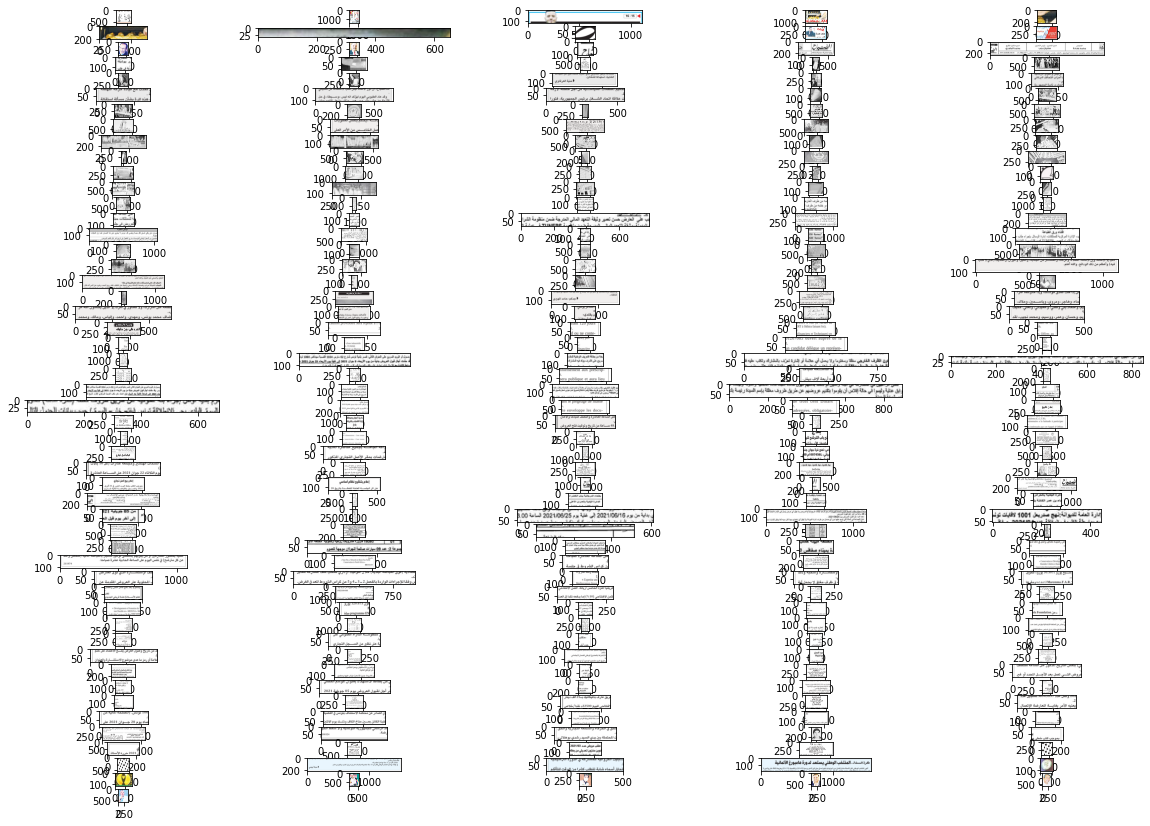

In [ ]:
n_path = '/content/drive/My Drive/crop_img/'
plt.figure(figsize=(20,20))
for i in range(len(lis)):
    plt.subplot(70,5,i+1)    # the number of images in the grid
    plt.imshow(lis[i], cmap='gray')
    if not os.path.exists(n_path):
        os.makedirs(n_path)
    cv2.imwrite(n_path+str(i+1)+ ".jpg", np.array(lis[i]))
plt.show()
#plt.imshow(image)

###Img2txt###

In [ ]:
!pip install ArabicOcr

In [ ]:
from ArabicOcr import arabicocr
image_path='/content/drive/MyDrive/ImagesFromPDF/0012.jpg'
out_image='/content/drive/MyDrive/ImagesFromPDF/out.jpg'
results=arabicocr.arabic_ocr(image_path,out_image)
print(results)
words=[]
for i in range(len(results)):	
		word=results[i][1]
		words.append(word)
with open ('file.txt','w',encoding='utf-8')as myfile:
		myfile.write(str(words))
  
######
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread(out_image, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)